In [2]:
%matplotlib inline

In [194]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

In [6]:
# Numbers of observations and features

n = 100 
m = 10   

In [8]:
# Seed for reproducibility

np.random.seed(0)

In [10]:
# Generate random features with different ranges

X = np.hstack([np.random.rand(n, 1) * 10**i for i in range(m)])

In [14]:
X

array([[5.48813504e-01, 6.77816537e+00, 3.11795882e+01, 9.06555499e+02,
        4.01259501e+03, 3.10380826e+04, 1.74658385e+05, 3.73215956e+06,
        3.99928019e+06, 8.10838615e+08],
       [7.15189366e-01, 2.70007973e+00, 6.96343489e+01, 7.74047333e+02,
        9.29291417e+03, 3.73034864e+04, 3.27988001e+05, 2.22863818e+06,
        6.39705106e+07, 3.48191943e+08],
       [6.02763376e-01, 7.35194022e+00, 3.77751839e+01, 3.33145152e+02,
        9.96149302e+02, 5.24970442e+04, 6.80348666e+05, 8.05320035e+05,
        4.08302908e+07, 2.11454796e+08],
       [5.44883183e-01, 9.62188545e+00, 1.79603678e+01, 8.11013900e+01,
        9.45301533e+03, 7.50595023e+04, 6.32076183e+04, 8.53109231e+05,
        3.77406573e+07, 5.93831880e+07],
       [4.23654799e-01, 2.48753144e+00, 2.46787284e+00, 4.07241171e+02,
        8.69488531e+03, 3.33507466e+04, 6.07249374e+05, 2.21396446e+06,
        8.09364971e+07, 8.76026848e+08],
       [6.45894113e-01, 5.76157334e+00, 6.72496315e+00, 2.32234142e+02,
   

In [16]:
# Generate random coefficients and intercept

coefficients = np.random.rand(m)
intercept = np.random.rand()

In [18]:
coefficients

array([0.59288027, 0.0100637 , 0.4758262 , 0.70877039, 0.04397543,
       0.87952148, 0.52008142, 0.03066105, 0.22441361, 0.9536757 ])

In [20]:
intercept

0.5823197330520553

In [22]:
# Generate the dependent variable as a linear combination of the features with added noise

noise = np.random.randn(n) * 0.5
y = X @ coefficients + intercept + noise

In [24]:
noise

array([-0.16038993, -0.29633241, -0.19601471, -0.01771574, -0.1555805 ,
       -1.30447082,  0.25560968, -0.73916013, -0.40330343,  0.38662317,
        0.75603623,  0.65249123, -0.01651851,  0.60063555, -0.04180221,
       -0.54282743, -0.6342585 , -0.38736358, -0.30134933, -0.18976268,
       -0.57381708,  0.04134654,  0.5112842 , -0.73952585,  0.95052569,
       -0.43665886, -0.04093007,  0.58594746, -0.00546744, -0.16371269,
        0.36597774, -0.27572459, -0.37606686, -0.53068029,  0.33756665,
        0.45694517,  0.88875859,  0.25173956,  0.00345978, -0.1506536 ,
       -0.04855382,  0.09673931,  0.28836667, -0.47296516, -0.15565149,
       -0.25865568,  0.02783348,  0.0948177 , -1.22755923,  0.24865664,
       -0.2525065 ,  0.19305033, -0.23251002,  0.05984861,  0.26137552,
        0.12702816, -1.08850804,  0.18351777,  0.16643372, -0.24793401,
        0.04705718,  0.19101916, -0.90040056,  0.23139485, -0.07150429,
        0.13112743,  0.05027821,  0.75032838, -0.02371521, -0.37

In [26]:
y

array([7.74407976e+08, 3.46690760e+08, 2.11247172e+08, 6.52273499e+07,
       8.54022473e+08, 8.92267877e+08, 1.36277329e+08, 3.27026128e+08,
       1.87700985e+08, 1.28301865e+08, 8.66499078e+08, 6.85715524e+07,
       9.42348348e+08, 1.11874947e+08, 8.26146680e+08, 5.45333026e+08,
       3.55440017e+08, 3.36063316e+08, 7.39377733e+08, 3.12662901e+08,
       6.38274948e+08, 4.94058484e+08, 4.72389908e+08, 8.61602976e+08,
       5.34254252e+08, 8.10247450e+08, 6.97452725e+08, 5.67808865e+07,
       7.55730041e+08, 2.10620062e+08, 8.75093463e+08, 4.38035752e+07,
       3.34369113e+08, 1.09795219e+08, 4.72352163e+08, 7.93512097e+08,
       3.05102071e+08, 1.45328397e+08, 3.21942984e+08, 7.92745002e+08,
       1.43719868e+08, 2.21553084e+08, 6.86346100e+07, 6.91675243e+08,
       3.88013410e+08, 3.16343711e+08, 7.02481161e+08, 3.30242868e+08,
       7.03230200e+08, 7.89244181e+08, 2.27952632e+08, 9.45732511e+08,
       1.55402827e+08, 2.93239505e+08, 1.92692255e+08, 3.45751988e+08,
      

In [28]:
# Create a DataFrame for features

feature_names = [f"x_{i+1}" for i in range(m)]
df_features = pd.DataFrame(X, columns=feature_names)

In [30]:
df_features

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,0.548814,6.778165,31.179588,906.555499,4012.595008,31038.082598,174658.385395,3.732160e+06,3.999280e+06,8.108386e+08
1,0.715189,2.700080,69.634349,774.047333,9292.914173,37303.486388,327988.000908,2.228638e+06,6.397051e+07,3.481919e+08
2,0.602763,7.351940,37.775184,333.145152,996.149302,52497.044225,680348.666015,8.053200e+05,4.083029e+07,2.114548e+08
3,0.544883,9.621885,17.960368,81.101390,9453.015335,75059.502293,63207.618339,8.531092e+05,3.774066e+07,5.938319e+07
4,0.423655,2.487531,2.467873,407.241171,8694.885305,33350.746579,607249.374012,2.213964e+06,8.093650e+07,8.760268e+08
...,...,...,...,...,...,...,...,...,...,...
95,0.183191,4.904588,22.431703,958.982722,2716.527676,99796.225133,365099.877060,9.325612e+06,4.981796e+07,9.767637e+07
96,0.586513,2.274146,9.784448,355.368848,4554.441495,36218.905894,190566.914940,3.917969e+06,8.667885e+07,5.149222e+08
97,0.020108,2.543565,86.219152,356.706890,4017.135354,47064.894921,19122.897449,2.421786e+06,6.277348e+07,9.384120e+08
98,0.828940,0.580292,97.291949,16.328503,2484.134651,37824.517492,518149.813791,2.503982e+06,4.014279e+07,2.286466e+08


In [32]:
# Create a DataFrame for the target variable

df_target = pd.DataFrame(y, columns=["y"])

In [34]:
df_target

,y
0,7.744080e+08
1,3.466908e+08
2,2.112472e+08
3,6.522735e+07
4,8.540225e+08
...,...
95,1.048958e+08
96,5.107723e+08
97,9.091540e+08
98,2.274429e+08


In [36]:
# Combine features and target into a single DataFrame

df = pd.concat([df_features, df_target], axis=1)

In [38]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,0.548814,6.778165,31.179588,906.555499,4012.595008,31038.082598,174658.385395,3.732160e+06,3.999280e+06,8.108386e+08,7.744080e+08
1,0.715189,2.700080,69.634349,774.047333,9292.914173,37303.486388,327988.000908,2.228638e+06,6.397051e+07,3.481919e+08,3.466908e+08
2,0.602763,7.351940,37.775184,333.145152,996.149302,52497.044225,680348.666015,8.053200e+05,4.083029e+07,2.114548e+08,2.112472e+08
3,0.544883,9.621885,17.960368,81.101390,9453.015335,75059.502293,63207.618339,8.531092e+05,3.774066e+07,5.938319e+07,6.522735e+07
4,0.423655,2.487531,2.467873,407.241171,8694.885305,33350.746579,607249.374012,2.213964e+06,8.093650e+07,8.760268e+08,8.540225e+08
...,...,...,...,...,...,...,...,...,...,...,...
95,0.183191,4.904588,22.431703,958.982722,2716.527676,99796.225133,365099.877060,9.325612e+06,4.981796e+07,9.767637e+07,1.048958e+08
96,0.586513,2.274146,9.784448,355.368848,4554.441495,36218.905894,190566.914940,3.917969e+06,8.667885e+07,5.149222e+08,5.107723e+08
97,0.020108,2.543565,86.219152,356.706890,4017.135354,47064.894921,19122.897449,2.421786e+06,6.277348e+07,9.384120e+08,9.091540e+08
98,0.828940,0.580292,97.291949,16.328503,2484.134651,37824.517492,518149.813791,2.503982e+06,4.014279e+07,2.286466e+08,2.274429e+08


In [40]:
# Save the dataset to a CSV file

df.to_csv("generated_dataset.csv", index=False)

In [42]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,0.548814,6.778165,31.179588,906.555499,4012.595008,31038.082598,174658.385395,3.732160e+06,3.999280e+06,8.108386e+08,7.744080e+08
1,0.715189,2.700080,69.634349,774.047333,9292.914173,37303.486388,327988.000908,2.228638e+06,6.397051e+07,3.481919e+08,3.466908e+08
2,0.602763,7.351940,37.775184,333.145152,996.149302,52497.044225,680348.666015,8.053200e+05,4.083029e+07,2.114548e+08,2.112472e+08
3,0.544883,9.621885,17.960368,81.101390,9453.015335,75059.502293,63207.618339,8.531092e+05,3.774066e+07,5.938319e+07,6.522735e+07
4,0.423655,2.487531,2.467873,407.241171,8694.885305,33350.746579,607249.374012,2.213964e+06,8.093650e+07,8.760268e+08,8.540225e+08
...,...,...,...,...,...,...,...,...,...,...,...
95,0.183191,4.904588,22.431703,958.982722,2716.527676,99796.225133,365099.877060,9.325612e+06,4.981796e+07,9.767637e+07,1.048958e+08
96,0.586513,2.274146,9.784448,355.368848,4554.441495,36218.905894,190566.914940,3.917969e+06,8.667885e+07,5.149222e+08,5.107723e+08
97,0.020108,2.543565,86.219152,356.706890,4017.135354,47064.894921,19122.897449,2.421786e+06,6.277348e+07,9.384120e+08,9.091540e+08
98,0.828940,0.580292,97.291949,16.328503,2484.134651,37824.517492,518149.813791,2.503982e+06,4.014279e+07,2.286466e+08,2.274429e+08


### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

In [44]:
# Separate features and target variable

X = df.drop(columns=["y"])
y = df["y"]

In [46]:
X

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,0.548814,6.778165,31.179588,906.555499,4012.595008,31038.082598,174658.385395,3.732160e+06,3.999280e+06,8.108386e+08
1,0.715189,2.700080,69.634349,774.047333,9292.914173,37303.486388,327988.000908,2.228638e+06,6.397051e+07,3.481919e+08
2,0.602763,7.351940,37.775184,333.145152,996.149302,52497.044225,680348.666015,8.053200e+05,4.083029e+07,2.114548e+08
3,0.544883,9.621885,17.960368,81.101390,9453.015335,75059.502293,63207.618339,8.531092e+05,3.774066e+07,5.938319e+07
4,0.423655,2.487531,2.467873,407.241171,8694.885305,33350.746579,607249.374012,2.213964e+06,8.093650e+07,8.760268e+08
...,...,...,...,...,...,...,...,...,...,...
95,0.183191,4.904588,22.431703,958.982722,2716.527676,99796.225133,365099.877060,9.325612e+06,4.981796e+07,9.767637e+07
96,0.586513,2.274146,9.784448,355.368848,4554.441495,36218.905894,190566.914940,3.917969e+06,8.667885e+07,5.149222e+08
97,0.020108,2.543565,86.219152,356.706890,4017.135354,47064.894921,19122.897449,2.421786e+06,6.277348e+07,9.384120e+08
98,0.828940,0.580292,97.291949,16.328503,2484.134651,37824.517492,518149.813791,2.503982e+06,4.014279e+07,2.286466e+08


In [48]:
y

0     7.744080e+08
1     3.466908e+08
2     2.112472e+08
3     6.522735e+07
4     8.540225e+08
          ...     
95    1.048958e+08
96    5.107723e+08
97    9.091540e+08
98    2.274429e+08
99    6.557973e+08
Name: y, Length: 100, dtype: float64

In [50]:
# Initialize and fit the Linear Regression model

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [52]:
# Predict the target values
y_pred = model.predict(X)

In [54]:
y_pred

array([7.74407976e+08, 3.46690760e+08, 2.11247172e+08, 6.52273497e+07,
       8.54022473e+08, 8.92267878e+08, 1.36277329e+08, 3.27026128e+08,
       1.87700985e+08, 1.28301865e+08, 8.66499077e+08, 6.85715518e+07,
       9.42348348e+08, 1.11874946e+08, 8.26146680e+08, 5.45333027e+08,
       3.55440017e+08, 3.36063317e+08, 7.39377733e+08, 3.12662901e+08,
       6.38274949e+08, 4.94058483e+08, 4.72389907e+08, 8.61602976e+08,
       5.34254251e+08, 8.10247451e+08, 6.97452725e+08, 5.67808859e+07,
       7.55730041e+08, 2.10620062e+08, 8.75093462e+08, 4.38035752e+07,
       3.34369113e+08, 1.09795219e+08, 4.72352163e+08, 7.93512096e+08,
       3.05102070e+08, 1.45328397e+08, 3.21942984e+08, 7.92745002e+08,
       1.43719868e+08, 2.21553084e+08, 6.86346094e+07, 6.91675244e+08,
       3.88013410e+08, 3.16343711e+08, 7.02481161e+08, 3.30242868e+08,
       7.03230201e+08, 7.89244181e+08, 2.27952633e+08, 9.45732511e+08,
       1.55402827e+08, 2.93239505e+08, 1.92692254e+08, 3.45751988e+08,
      

In [56]:
# Calculate R^2 score

r2 = r2_score(y, y_pred)

In [58]:
r2

1.0

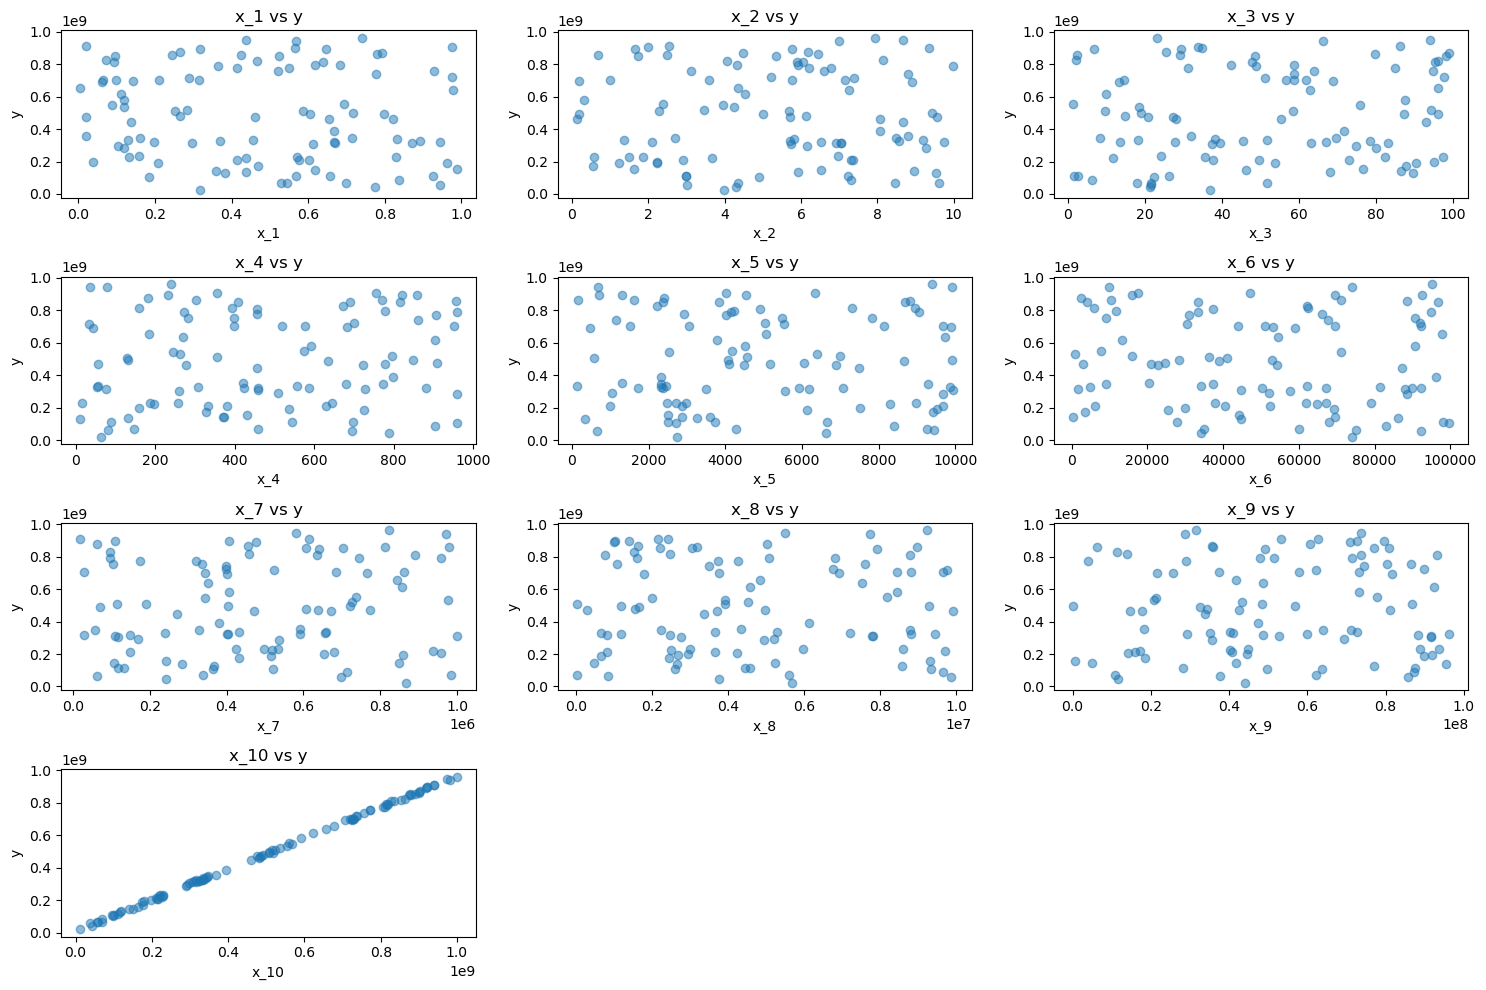

In [60]:
# Plotting scatter plots for each feature against the target variable

feature_names = X.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 3, i+1)  
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f"{feature} vs y")
    plt.xlabel(feature)
    plt.ylabel("y")

plt.tight_layout()
plt.show()

In [62]:
# Display model coefficients

coefficients = model.coef_
intercept = model.intercept_

In [64]:
coefficients

array([0.40169929, 0.01221617, 0.47595573, 0.70875111, 0.04396259,
       0.87952097, 0.5200814 , 0.03066106, 0.22441361, 0.9536757 ])

In [66]:
intercept

0.5228797197341919

In [68]:
# Model coefficients

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

x_1: 0.40
x_2: 0.01
x_3: 0.48
x_4: 0.71
x_5: 0.04
x_6: 0.88
x_7: 0.52
x_8: 0.03
x_9: 0.22
x_10: 0.95
Intercept: 0.52


### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

In [70]:
# Calculate predictions 

def linear_regression_predict(coefficients, data):
    data_augmented = np.hstack((data, np.ones((data.shape[0], 1))))
    coefficients = np.array(coefficients)
    predictions = np.dot(data_augmented, coefficients)
    return predictions

In [78]:
# Assume the last column is the target, and the rest are features

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [88]:
# Example coefficients, including the intercept as the last coefficient

coefficients = np.random.rand(X.shape[1] + 1)  

In [90]:
coefficients

array([0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903,
       0.8002556 , 0.95556839, 0.31655021, 0.82680527, 0.10399084,
       0.63398165])

In [92]:
# Test the function
predictions = linear_regression_predict(coefficients, X)

In [100]:
predictions

array([8.90008735e+07, 9.01513913e+07, 5.66954857e+07, 3.77725712e+07,
       1.59327710e+08, 1.54992095e+08, 9.25765465e+07, 6.43222593e+07,
       9.31678734e+07, 7.88116474e+07, 1.24088040e+08, 5.94375864e+07,
       1.29255861e+08, 8.39533020e+07, 9.97171366e+07, 7.74932323e+07,
       5.53455854e+07, 7.12524183e+07, 1.41915610e+08, 7.97786248e+07,
       1.11436329e+08, 5.74921292e+07, 8.63088760e+07, 1.02636915e+08,
       7.70744411e+07, 1.66738910e+08, 9.62248258e+07, 7.88442308e+07,
       1.49513504e+08, 3.70392999e+07, 1.45648495e+08, 1.54787158e+07,
       9.64373228e+07, 6.44260119e+07, 1.18915517e+08, 1.27995385e+08,
       1.07687906e+08, 2.15947461e+07, 5.95518148e+07, 1.45052422e+08,
       5.01280932e+07, 4.19644976e+07, 1.70268377e+07, 1.41959998e+08,
       8.26017168e+07, 1.05673336e+08, 1.38863522e+08, 7.17883514e+07,
       1.10490046e+08, 1.29135787e+08, 9.76337321e+07, 1.64532029e+08,
       2.05233152e+07, 8.94901733e+07, 9.64479240e+07, 9.75116849e+07,
      

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

In [144]:
def compute_cost_and_gradients(X, y, coefficients):
    n_samples = X.shape[0]
    
    # Extract coefficients for a and b
    a_coeffs = coefficients[:-1]
    b = coefficients[-1]
    
    # Compute predictions
    y_pred = np.dot(X, a_coeffs) + b
    
    # Compute the cost function (MSE)
    residuals = y_pred - y
    J = (1 / (2 * n_samples)) * np.sum(residuals ** 2)
    
    # Compute gradients
    grad_a = (1 / n_samples) * np.dot(X.T, residuals)
    grad_b = (1 / n_samples) * np.sum(residuals)
    
    # Combine gradients into a single array
    gradients = np.append(grad_a, grad_b)
    
    return J, gradients

In [146]:
coefficients = np.random.rand(X.shape[1] + 1)

In [148]:
# Compute the cost and gradients

cost, gradients = compute_cost_and_gradients(X, y, coefficients)

In [152]:
cost, gradients

(306102448084650.3,
 array([6.98589979e+06, 7.51750409e+07, 6.47702402e+08, 6.39643534e+09,
        6.49995409e+10, 7.75310004e+11, 6.22459946e+12, 7.57283924e+13,
        1.16652167e+15, 3.40545652e+15, 1.41155963e+07]))

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

In [178]:
# Normalize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [180]:
def gradient_descent(X, y, learning_rate=0.001, iterations=10000, tolerance=1e-6):
    n_samples, n_features = X.shape
    coefficients = np.random.randn(n_features + 1) * 0.01  # Initialize coefficients to small values
    costs = []

    for iteration in range(iterations):
        cost = compute_cost(X, y, coefficients)
        gradients = compute_gradients(X, y, coefficients)
        
        costs.append(cost)
        
        coefficients -= learning_rate * gradients
        
        if iteration > 0 and abs(costs[-1] - costs[-2]) < tolerance:
            print(f"Convergence reached at iteration {iteration}")
            break
    
    return coefficients, costs

In [182]:
# Use the scaled data

learning_rate = 0.001
iterations = 10000
coefficients, costs = gradient_descent(X_scaled, y, learning_rate, iterations)

In [184]:
coefficients, costs[-1]  

(array([-3.67635652e+04,  5.78762650e+04,  9.33179481e+04,  8.80715649e+04,
        -5.75460150e+04,  3.31694902e+04,  2.51627921e+05,  1.25208006e+03,
         6.11901119e+06,  2.80366030e+08,  4.83353321e+08]),
 17359169011.99638)

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

In [192]:
df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.472794,5.280818,50.963198,472.757460,4997.231677,50622.851036,485519.601696,4.686610e+06,5.217023e+07,4.941157e+08,4.833752e+08
std,0.289754,2.781030,30.320057,286.075354,3027.387902,30264.264646,280474.690185,3.006026e+06,2.726289e+07,2.955797e+08,2.820834e+08
min,0.004695,0.117141,1.323686,11.427459,120.362229,270.321389,19122.897449,1.383350e+04,5.459649e+04,1.217116e+07,2.220167e+07
25%,0.205803,2.955971,23.854699,244.030476,2491.683971,27271.159224,263914.483622,2.224970e+06,3.238379e+07,2.255478e+08,2.278252e+08
50%,0.467481,5.752413,50.435517,456.525994,4390.436856,52246.140841,463839.832625,4.257837e+06,4.897843e+07,4.837749e+08,4.723710e+08
75%,0.684483,7.300234,78.837639,724.524319,7588.822560,73993.731978,699490.732481,7.628257e+06,7.514165e+07,7.716966e+08,7.552568e+08
max,0.988374,9.988470,99.033895,959.433341,9944.007896,99796.225133,999277.993922,9.918903e+06,9.631973e+07,9.998086e+08,9.613918e+08


In [202]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
m, n = X.shape

In [204]:
# Add a bias term (column of ones) to X

X = np.hstack([np.ones((m, 1)), X])

In [206]:
# Define MAE and its gradient

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [208]:
def mae_gradient(X, y_true, y_pred):
    grad = np.where(y_pred > y_true, 1, -1)
    return np.dot(X.T, grad) / len(y_true)

In [210]:
# Define Huber Loss and its gradient

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

In [212]:
def huber_gradient(X, y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    grad = np.where(is_small_error, -error, -delta * np.sign(error))
    return np.dot(X.T, grad) / len(y_true)

In [214]:
# Gradient descent implementation

def gradient_descent(X, y, loss_func, gradient_func, lr=0.01, iterations=1000, delta=1.0):
    theta = np.zeros(X.shape[1])  
    loss_history = []
    start_time = time.time()  
    
    for i in range(iterations):
        y_pred = np.dot(X, theta)
        loss = loss_func(y, y_pred)  
        loss_history.append(loss)  
        
        grad = gradient_func(X, y, y_pred, delta) if "huber" in gradient_func.__name__ else gradient_func(X, y, y_pred)
        theta -= lr * grad
    
    end_time = time.time()  
    return theta, loss_history, end_time - start_time  

In [216]:
# Running the gradient descent for MAE and Huber Loss

iterations = 1000
learning_rate = 0.01

In [218]:
# MAE

theta_mae, loss_history_mae, time_mae = gradient_descent(X, y, mae, mae_gradient, lr=learning_rate, iterations=iterations)

In [220]:
# Huber Loss

theta_huber, loss_history_huber, time_huber = gradient_descent(X, y, huber_loss, huber_gradient, lr=learning_rate, iterations=iterations, delta=1.0)

In [224]:
loss_history_mae[-1]

2468942145251564.0

In [226]:
time_mae

0.023545026779174805

In [228]:
loss_history_huber[-1]

2468942145251563.0

In [230]:
time_huber

0.02730393409729004

MAE and Huber Loss both produced very similar final loss values.
The high final loss suggests that neither method achieved a particularly good fit.
Huber Loss was slightly faster than MAE.


### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

In [301]:
m, n = X.shape

In [303]:
# Learning rates to experiment with Huber lost

learning_rates = [1e-6, 1e-4, 1e-2, 0.1, 1]

In [305]:
# DataFrame to store results

results = pd.DataFrame(columns=["Learning Rate", "Final Loss", "Training Time"])


In [309]:
# Run the experiment

for lr in learning_rates:
    _, loss_history, training_time = gradient_descent(X, y, lr=lr, iterations=1000, delta=1.0)
    final_loss = loss_history[-1]
    
    new_row = pd.DataFrame({"Learning Rate": [lr], "Final Loss": [final_loss], "Training Time": [training_time]})
    
    results = pd.concat([results, new_row], ignore_index=True)

/var/folders/nr/w2b2xpqj79q40hh6j8sw7glw0000gn/T/ipykernel_8965/3770165478.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [317]:
results

,Learning Rate,Final Loss,Training Time
0,0.000001,2.464109e+11,0.027524
1,0.000100,2.468894e+13,0.015067
2,0.010000,2.468942e+15,0.014363
3,0.100000,2.468943e+16,0.013716
4,1.000000,2.468943e+17,0.012662


The final loss values increase drastically as the learning rate increases.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

In [320]:
# Set the random seed for reproducibility

np.random.seed(42)

In [322]:
# Define the number of samples per cluster and the number of features

n_samples_per_cluster = 100
n_features = 10
n_clusters = 2

In [324]:
# Generate random centers for each cluster

centers = np.random.uniform(low=-10, high=10, size=(n_clusters, n_features))

In [326]:
# Generate data for each cluster

data = []
for i in range(n_clusters):
    cluster_data = np.random.randn(n_samples_per_cluster, n_features) + centers[i]
    labels = np.full(n_samples_per_cluster, i)
    data.append(np.hstack((cluster_data, labels.reshape(-1, 1))))

In [328]:
# Combine all clusters into a single dataset

data = np.vstack(data)

In [330]:
# Convert the data into a pandas DataFrame

columns = [f"x_{i+1}" for i in range(n_features)] + ["y"]
df = pd.DataFrame(data, columns=columns)

In [336]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,-3.522029,9.328533,3.731855,0.560866,-5.413978,-7.105886,-8.770800,5.898775,1.477918,4.272374,0.0
1,-3.660191,9.389984,4.039240,1.681476,-7.481334,-5.027831,-8.851825,6.265812,2.844845,2.940608,0.0
2,-2.300334,7.054616,3.311693,2.170031,-6.141161,-6.708741,-8.953976,7.022419,0.543778,3.441607,0.0
3,-2.969836,10.071408,4.983497,0.210130,-6.555543,-7.265192,-9.515250,7.935199,3.053300,5.092732,0.0
4,-3.348415,8.705074,4.971142,2.948715,-7.358801,-7.065769,-9.944663,6.127316,2.834826,5.517692,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,-9.785649,9.246924,6.453945,-4.619448,-5.769944,-9.272298,-3.259254,0.689865,-1.379808,-4.563936,1.0
196,-8.464197,10.345724,5.875975,-5.346165,-7.335157,-7.711528,-4.541872,1.357522,-0.407975,-3.662332,1.0
197,-8.863214,9.914375,6.007371,-5.321295,-5.563091,-5.577618,-2.726242,1.203432,-1.009651,-3.105267,1.0
198,-9.614831,8.516322,6.485786,-6.498120,-7.038679,-6.476428,-4.707575,0.187167,-3.254714,-3.962123,1.0


### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

In [340]:
# Convert the data into a pandas DataFrame
columns = [f"x_{i+1}" for i in range(n_features)] + ["y"]
blob_data = pd.DataFrame(data, columns=columns)

In [342]:
# Step 2: Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [344]:
# Step 3: Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [346]:
# Step 4: Logistic Regression model
def logistic_regression(X, y, learning_rate, iterations):
    m, n = X.shape
    weights = np.zeros((n, 1))
    bias = 0
    
    losses = []
    
    for i in range(iterations):
        # Linear combination
        z = np.dot(X, weights) + bias
        
        # Prediction
        y_pred = sigmoid(z)
        
        # Compute loss
        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)
        
        # Gradient descent
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias, losses

In [348]:
# Step 1: Data Preparation (Using the synthetic data generated previously)
# Assuming 'blob_data' contains the dataset with features 'x_1' to 'x_10' and target 'y'

X = blob_data.drop(columns="y").values
y = blob_data["y"].values.reshape(-1, 1)

In [350]:
results2 = []

In [352]:
for lr in learning_rates:
    weights, bias, losses = logistic_regression(X, y, learning_rate=lr, iterations=1000)
    final_loss = losses[-1]
    results2.append({
        'Learning Rate': lr,
        'Final Loss': final_loss
    })

In [354]:
results2

[{'Learning Rate': 1e-06, 'Final Loss': 0.6767732661277281},
 {'Learning Rate': 0.0001, 'Final Loss': 0.1607449808629643},
 {'Learning Rate': 0.01, 'Final Loss': 0.001795111920526573},
 {'Learning Rate': 0.1, 'Final Loss': 0.00019196800779089116},
 {'Learning Rate': 1, 'Final Loss': 4.107658103346781e-12}]